# 1. Import libraries and load dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_excel('Atlanta.xlsx')
df.head()


,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Atlanta,United States,33.749001,-84.387978,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlanta,United States,33.749001,-84.387978,2012-10-01 13:00:00,94.0,1006.0,294.030000,light rain,110.0,3.0
2,Atlanta,United States,33.749001,-84.387978,2012-10-01 14:00:00,94.0,1006.0,294.035341,overcast clouds,110.0,3.0
3,Atlanta,United States,33.749001,-84.387978,2012-10-01 15:00:00,94.0,1006.0,294.049702,overcast clouds,111.0,3.0
4,Atlanta,United States,33.749001,-84.387978,2012-10-01 16:00:00,94.0,1006.0,294.064063,overcast clouds,111.0,3.0


In [20]:
df.tail()

,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
45248,Atlanta,United States,33.749001,-84.387978,2017-11-29 20:00:00,82.0,1024.0,290.04,mist,146.0,1.0
45249,Atlanta,United States,33.749001,-84.387978,2017-11-29 21:00:00,73.0,1023.0,291.42,mist,100.0,1.0
45250,Atlanta,United States,33.749001,-84.387978,2017-11-29 22:00:00,77.0,1023.0,291.84,haze,146.0,1.0
45251,Atlanta,United States,33.749001,-84.387978,2017-11-29 23:00:00,82.0,1023.0,290.64,broken clouds,126.0,1.0
45252,Atlanta,United States,33.749001,-84.387978,2017-11-30 00:00:00,100.0,1024.0,287.74,fog,126.0,1.0


In [21]:
df.shape


(45253, 11)

In [22]:
df.describe

<bound method NDFrame.describe of           City        Country   Latitude  Longitude            datetime  \
0      Atlanta  United States  33.749001 -84.387978 2012-10-01 12:00:00   
1      Atlanta  United States  33.749001 -84.387978 2012-10-01 13:00:00   
2      Atlanta  United States  33.749001 -84.387978 2012-10-01 14:00:00   
3      Atlanta  United States  33.749001 -84.387978 2012-10-01 15:00:00   
4      Atlanta  United States  33.749001 -84.387978 2012-10-01 16:00:00   
...        ...            ...        ...        ...                 ...   
45248  Atlanta  United States  33.749001 -84.387978 2017-11-29 20:00:00   
45249  Atlanta  United States  33.749001 -84.387978 2017-11-29 21:00:00   
45250  Atlanta  United States  33.749001 -84.387978 2017-11-29 22:00:00   
45251  Atlanta  United States  33.749001 -84.387978 2017-11-29 23:00:00   
45252  Atlanta  United States  33.749001 -84.387978 2017-11-30 00:00:00   

       Humidity  Pressure  Temperature Weather Description  Wind 

In [23]:
df.columns


Index(['City', 'Country', 'Latitude', 'Longitude', 'datetime', 'Humidity',
       'Pressure', 'Temperature', 'Weather Description', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [24]:
df.nunique()#gives the no of unique values

City                       1
Country                    1
Latitude                   1
Longitude                  1
datetime               45253
Humidity                  95
Pressure                  70
Temperature            15157
Weather Description       30
Wind Direction           361
Wind Speed                19
dtype: int64

In [25]:
#unique values for a particular row
df['Weather Description'].unique()

array([nan, 'light rain', 'overcast clouds', 'heavy intensity rain',
       'moderate rain', 'mist', 'light intensity drizzle',
       'scattered clouds', 'broken clouds', 'drizzle', 'sky is clear',
       'fog', 'few clouds', 'haze', 'thunderstorm with rain',
       'thunderstorm with light rain', 'heavy snow',
       'proximity thunderstorm', 'heavy intensity drizzle',
       'light intensity shower rain', 'thunderstorm',
       'proximity thunderstorm with rain', 'thunderstorm with heavy rain',
       'squalls', 'thunderstorm with light drizzle', 'light snow', 'snow',
       'very heavy rain', 'light shower snow', 'smoke',
       'thunderstorm with drizzle'], dtype=object)

# 2.Check for missing values

In [26]:
df.isnull().sum()#gives missing values column wise

City                     0
Country                  0
Latitude                 0
Longitude                0
datetime                 0
Humidity               422
Pressure                49
Temperature              6
Weather Description      1
Wind Direction           1
Wind Speed               1
dtype: int64

In [27]:
df.isnull().sum().sum()#gives total missing values

480

# 3. Checking the data types of each attribute.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 45253 non-null  object        
 1   Country              45253 non-null  object        
 2   Latitude             45253 non-null  float64       
 3   Longitude            45253 non-null  float64       
 4   datetime             45253 non-null  datetime64[ns]
 5   Humidity             44831 non-null  float64       
 6   Pressure             45204 non-null  float64       
 7   Temperature          45247 non-null  float64       
 8   Weather Description  45252 non-null  object        
 9   Wind Direction       45252 non-null  float64       
 10  Wind Speed           45252 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 3.8+ MB


# 4. Checking for wrong entries like symbols -,?,#,*,etc.

In [29]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

City : ['Atlanta']
Country : ['United States']
Latitude : [33.749001]
Longitude : [-84.387978]
datetime : ['2012-10-01T12:00:00.000000000' '2012-10-01T13:00:00.000000000'
 '2012-10-01T14:00:00.000000000' ... '2017-11-29T22:00:00.000000000'
 '2017-11-29T23:00:00.000000000' '2017-11-30T00:00:00.000000000']
Humidity : [ nan  94. 100.  88.  83.  93.  77.  72.  68.  64.  73.  82.  56.  60.
  47.  44.  53.  87.  46.  50.  42.  39.  37.  41.  89.  91.  51.  65.
  57.  69.  81.  76.  63.  55.  59.  58.  62.  66.  71.  78.  67.  52.
  84.  96.  49.  40.  33.  31.  38.  61.  43.  36.  35.  48.  29.  32.
  22.  21.  19.  30.  45.  75.  34.  27.  25.  74.  17.  18.  20.  26.
  80.  23.  16.  24.  70.  54.  86.  92.  28.  79.  12.  14.  85.  90.
  97.  95.  98.  13.  99.  10.  15.  11.   9.   6.   7.   8.]
Pressure : [  nan 1006. 1005. 1004. 1007. 1008. 1009. 1010. 1011. 1012. 1013. 1014.
 1015. 1016. 1017. 1018. 1019. 1020. 1021. 1022. 1023. 1024. 1025. 1026.
  999. 1000. 1027. 1028. 1002.  996.  

# 5. Visualizing the missing values

<AxesSubplot:>

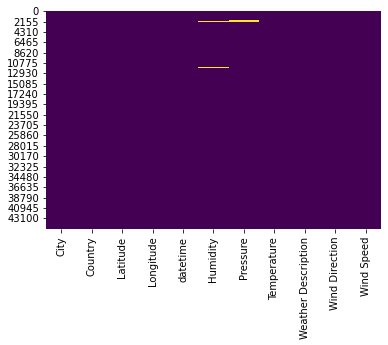

In [30]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

We can see that there are missing values only in humidity and pressure. Among these, more values are missing in column of humidity.

# 6.Replacing the missing values

In [31]:
#filling missing values with next rows data
df.head()
df1=df.fillna(method='bfill')
df1


,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Atlanta,United States,33.749001,-84.387978,2012-10-01 12:00:00,94.0,1006.0,294.030000,light rain,110.0,3.0
1,Atlanta,United States,33.749001,-84.387978,2012-10-01 13:00:00,94.0,1006.0,294.030000,light rain,110.0,3.0
2,Atlanta,United States,33.749001,-84.387978,2012-10-01 14:00:00,94.0,1006.0,294.035341,overcast clouds,110.0,3.0
3,Atlanta,United States,33.749001,-84.387978,2012-10-01 15:00:00,94.0,1006.0,294.049702,overcast clouds,111.0,3.0
4,Atlanta,United States,33.749001,-84.387978,2012-10-01 16:00:00,94.0,1006.0,294.064063,overcast clouds,111.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
45248,Atlanta,United States,33.749001,-84.387978,2017-11-29 20:00:00,82.0,1024.0,290.040000,mist,146.0,1.0
45249,Atlanta,United States,33.749001,-84.387978,2017-11-29 21:00:00,73.0,1023.0,291.420000,mist,100.0,1.0
45250,Atlanta,United States,33.749001,-84.387978,2017-11-29 22:00:00,77.0,1023.0,291.840000,haze,146.0,1.0
45251,Atlanta,United States,33.749001,-84.387978,2017-11-29 23:00:00,82.0,1023.0,290.640000,broken clouds,126.0,1.0


In [32]:
df1.isnull().sum().sum()

0

In [33]:
#Removing unnecessary columns
df2=df1.drop(['Latitude','Longitude'],axis=1)
df2.head()

,City,Country,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Atlanta,United States,2012-10-01 12:00:00,94.0,1006.0,294.030000,light rain,110.0,3.0
1,Atlanta,United States,2012-10-01 13:00:00,94.0,1006.0,294.030000,light rain,110.0,3.0
2,Atlanta,United States,2012-10-01 14:00:00,94.0,1006.0,294.035341,overcast clouds,110.0,3.0
3,Atlanta,United States,2012-10-01 15:00:00,94.0,1006.0,294.049702,overcast clouds,111.0,3.0
4,Atlanta,United States,2012-10-01 16:00:00,94.0,1006.0,294.064063,overcast clouds,111.0,3.0


# 7. Relationship analysis

<AxesSubplot:>

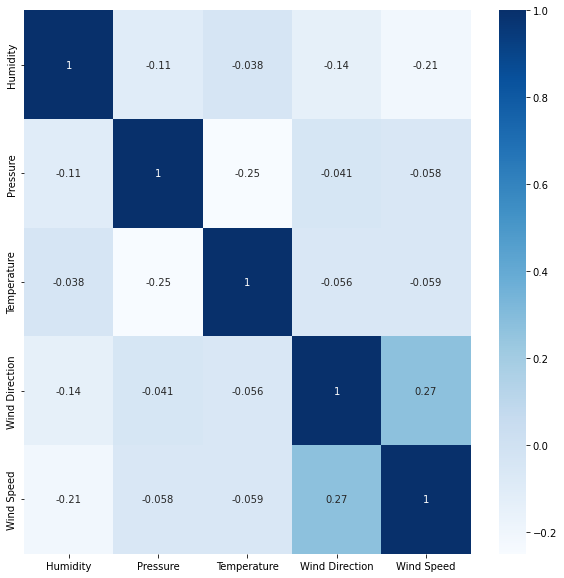

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cbar=True,annot=True,cmap='Blues')

Using pairplot

In [35]:
df2.corr()

,Humidity,Pressure,Temperature,Wind Direction,Wind Speed
Humidity,1.000000,-0.108034,-0.037676,-0.140532,-0.209363
Pressure,-0.108034,1.000000,-0.249980,-0.040882,-0.058431
Temperature,-0.037676,-0.249980,1.000000,-0.056096,-0.059448
Wind Direction,-0.140532,-0.040882,-0.056096,1.000000,0.267783
Wind Speed,-0.209363,-0.058431,-0.059448,0.267783,1.000000


<AxesSubplot:>

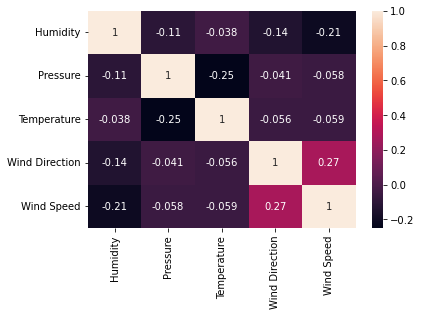

In [36]:
correlation=df2.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# 8. Pair plots

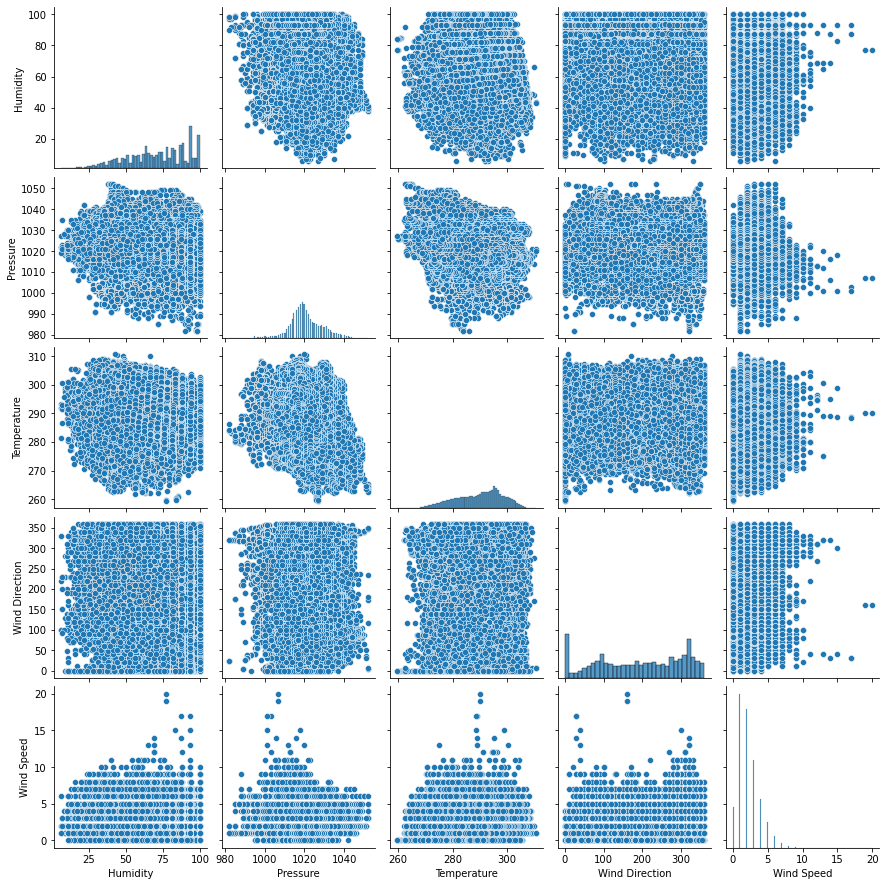

In [37]:
sns.pairplot(df2)

# 9. Scatter plots

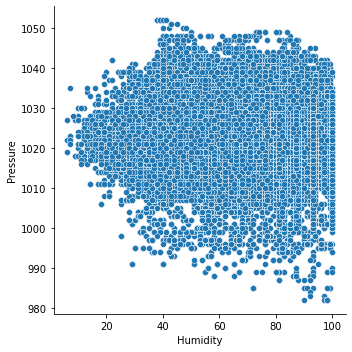

In [38]:
sns.relplot(x='Humidity',y='Pressure',data=df2)

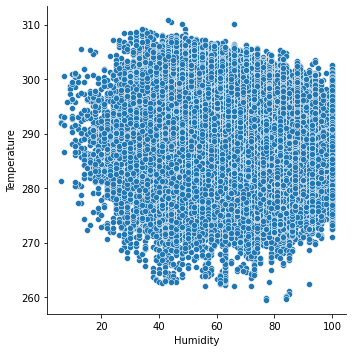

In [39]:
sns.relplot(x='Humidity',y='Temperature',data=df2)

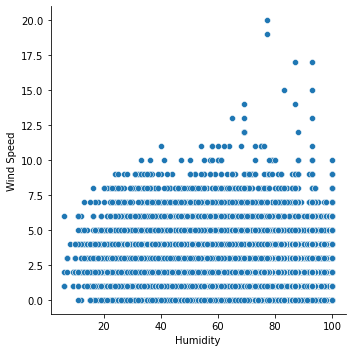

In [40]:
sns.relplot(x='Humidity',y='Wind Speed',data=df2)

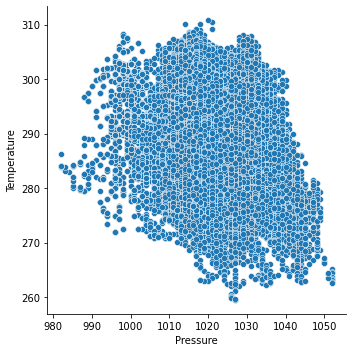

In [41]:
sns.relplot(x='Pressure',y='Temperature',data=df2)

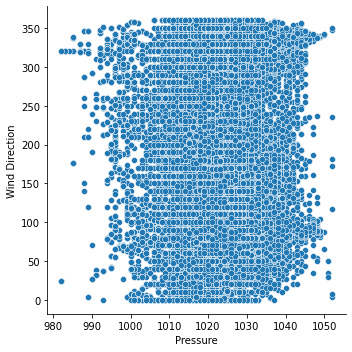

In [42]:
sns.relplot(x='Pressure',y='Wind Direction',data=df2)

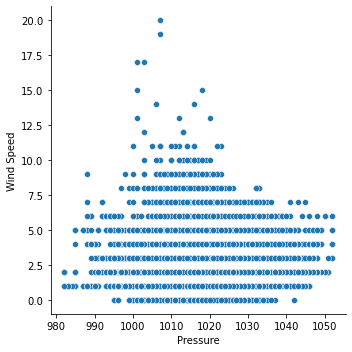

In [43]:
sns.relplot(x='Pressure',y='Wind Speed',data=df2)

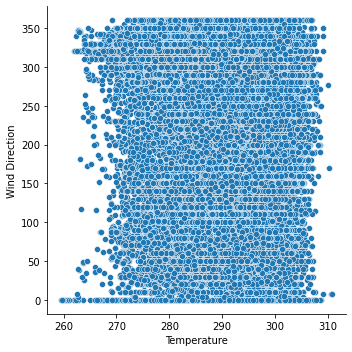

In [44]:
sns.relplot(x='Temperature',y='Wind Direction',data=df2)

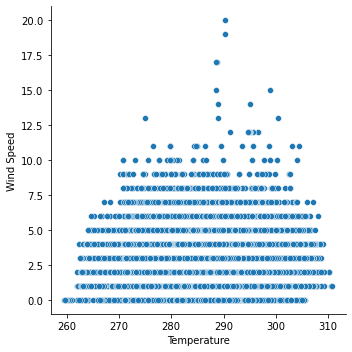

In [45]:
sns.relplot(x='Temperature',y='Wind Speed',data=df2)

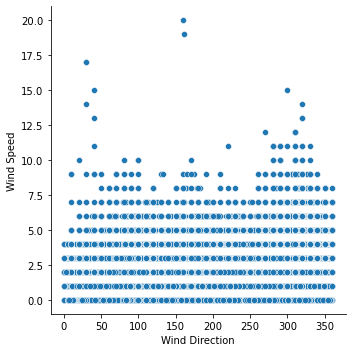

In [46]:
sns.relplot(x='Wind Direction',y='Wind Speed',data=df2)

# 10. Histogram Plots

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

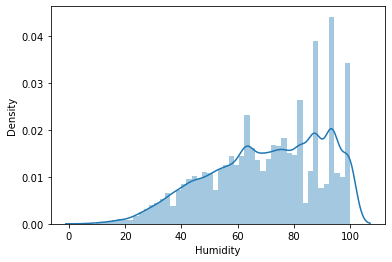

In [47]:
sns.distplot(df2['Humidity'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure', ylabel='Density'>

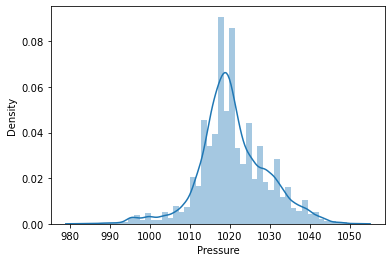

In [48]:
sns.distplot(df2['Pressure'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

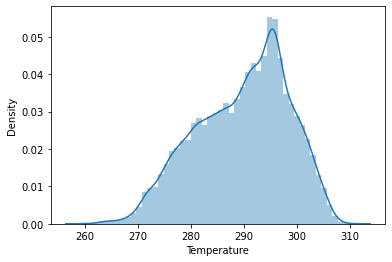

In [49]:
sns.distplot(df2['Temperature'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Direction', ylabel='Density'>

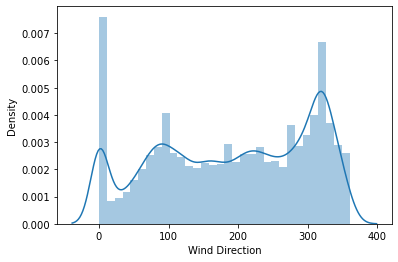

In [50]:
sns.distplot(df2['Wind Direction'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed', ylabel='Density'>

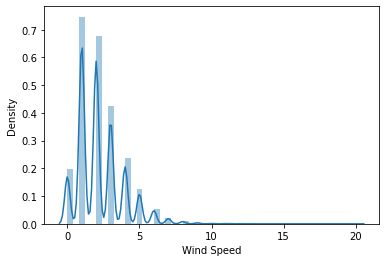

In [51]:
sns.distplot(df2['Wind Speed'])

# 11. Box Plot

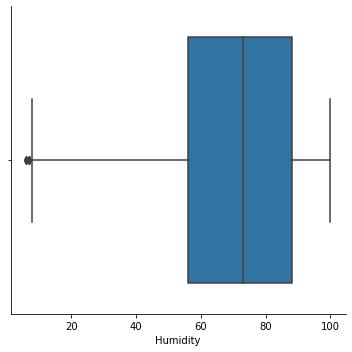

In [52]:
sns.catplot(x='Humidity',kind='box',data=df2)

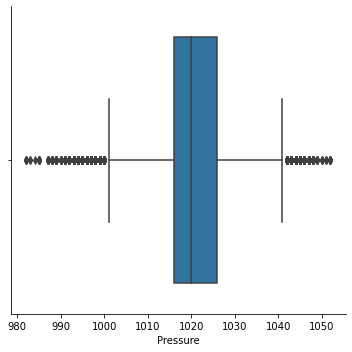

In [53]:
sns.catplot(x='Pressure',kind='box',data=df2)

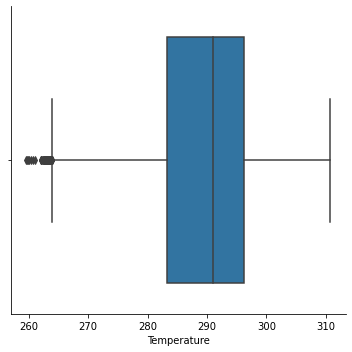

In [54]:
sns.catplot(x='Temperature',kind='box',data=df2)

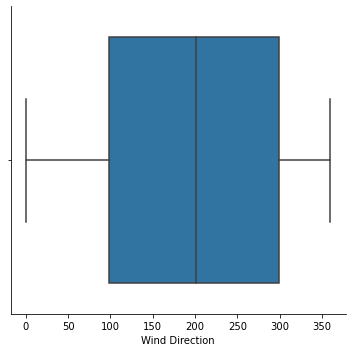

In [55]:
sns.catplot(x='Wind Direction',kind='box',data=df2)

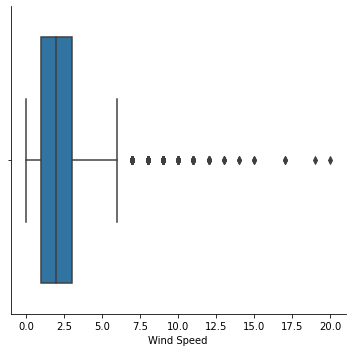

In [56]:
sns.catplot(x='Wind Speed',kind='box',data=df2)